In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

In [49]:
df = pd.read_csv('DB-NBA-cleaned.csv')

In [50]:
df.columns

Index(['SEASON_2', 'TEAM_ID', 'TEAM_NAME', 'PLAYER_ID', 'PLAYER_NAME',
       'POSITION_GROUP', 'POSITION', 'GAME_DATE', 'GAME_ID', 'HOME_TEAM',
       'AWAY_TEAM', 'SHOT_MADE', 'ACTION_TYPE', 'SHOT_TYPE', 'BASIC_ZONE',
       'ZONE_NAME', 'ZONE_RANGE', 'LOC_X', 'LOC_Y', 'SHOT_DISTANCE', 'QUARTER',
       'TIME_LEFT_SECONDS'],
      dtype='object')

## ✅ Resumen análisis incluyendo todas las Temporadas : '2019-20' '2020-21' '2021-22' '2022-23' '2023-24'
Lo que vamos a hacer:

### Rendimiento por jugador:

- Porcentaje de acierto global por jugador (SHOT_MADE por PLAYER_ID)

#### Rendimiento global por equipo:

- Porcentaje de acierto por TEAM_NAME

- Volumen de tiros intentados


In [51]:
# aqui decidimos que minimo de tiros queremos para decidir si un jugador es bueno o malo
# vemos tambien el porcentaje de los jugadores que cumplen con el criterio
# de 100 tiros, 50 tiros, 30 tiros, 20 tiros, 10 tiros y 5 tiros
total_players = df['PLAYER_NAME'].nunique()
print(f"Jugadores con ≥100 tiros:{(df.groupby('PLAYER_NAME')['SHOT_MADE'].count() >= 100).sum()} {round((df.groupby('PLAYER_NAME')['SHOT_MADE'].count() >= 100).sum()/total_players, 2)}%")
print(f"Jugadores con ≥50 tiros: {(df.groupby('PLAYER_NAME')['SHOT_MADE'].count() >= 50).sum()} {round((df.groupby('PLAYER_NAME')['SHOT_MADE'].count() >= 50).sum()/total_players, 2)}%")

print(f"Jugadores con ≥30 tiros: {(df.groupby('PLAYER_NAME')['SHOT_MADE'].count() >= 30).sum()} {round((df.groupby('PLAYER_NAME')['SHOT_MADE'].count() >= 30).sum()/total_players, 2)}%")
print(f"Jugadores con ≥20 tiros: {(df.groupby('PLAYER_NAME')['SHOT_MADE'].count() >= 20).sum()} {round((df.groupby('PLAYER_NAME')['SHOT_MADE'].count() >= 20).sum()/total_players, 2)}%")

print(f"Jugadores con ≥10 tiros: {(df.groupby('PLAYER_NAME')['SHOT_MADE'].count() >= 10).sum()} {round((df.groupby('PLAYER_NAME')['SHOT_MADE'].count() >= 10).sum()/total_players, 2)}")
print(f"Jugadores con ≥5 tiros: {(df.groupby('PLAYER_NAME')['SHOT_MADE'].count() >= 5).sum()} {round((df.groupby('PLAYER_NAME')['SHOT_MADE'].count() >= 5).sum()/total_players, 2)}")


Jugadores con ≥100 tiros:670 0.7%
Jugadores con ≥50 tiros: 754 0.79%
Jugadores con ≥30 tiros: 789 0.83%
Jugadores con ≥20 tiros: 826 0.87%
Jugadores con ≥10 tiros: 876 0.92
Jugadores con ≥5 tiros: 913 0.96


### 📊 Gráfica Top 5 jugadores con mejor porcentaje de acierto
#### Descripción:

Analizamos a los jugadores con mayor efectividad de tiro en toda la base de datos. Se excluyen jugadores con pocos tiros, menos de 20 para evitar sesgos por muestras pequeñas.

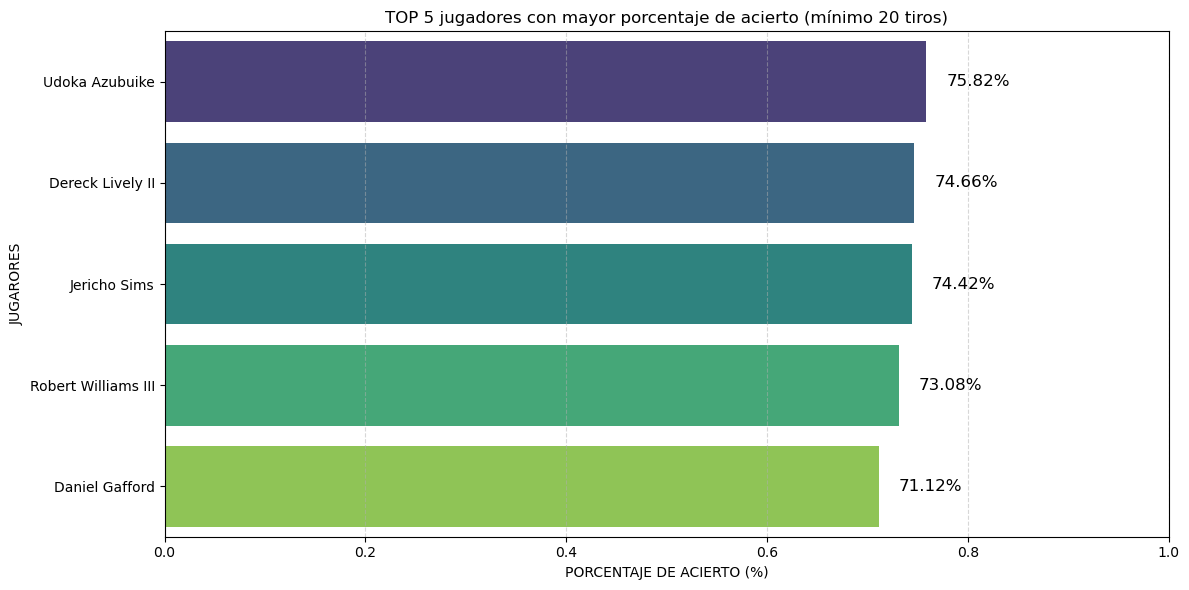

In [52]:

# Agrupar por jugador
player_stats = df.groupby('PLAYER_NAME').agg(
    shots_made=('SHOT_MADE', 'sum'),
    shots_attempted=('SHOT_MADE', 'count')
).reset_index()

# Calcular porcentaje de acierto
player_stats['accuracy'] = player_stats['shots_made'] / player_stats['shots_attempted']

# Filtrar jugadores con al menos 20 tiros
player_stats_filtered = player_stats[player_stats['shots_attempted'] >= 20]

# Tomar top 5 por precisión
top5 = player_stats_filtered.sort_values(by='accuracy', ascending=False).head(5)

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(data=top5, x='accuracy', y='PLAYER_NAME', hue='PLAYER_NAME', palette='viridis', legend=False)
for index, value in enumerate(top5['accuracy']):
    plt.text(value + 0.02, index, f'{value:.2%}', va='center', fontsize=12)
plt.title('TOP 5 jugadores con mayor porcentaje de acierto (mínimo 20 tiros)')
plt.xlabel('PORCENTAJE DE ACIERTO (%)')
plt.ylabel('JUGARORES')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



### ✅ Conclusión:

Este análisis nos revela qué jugadores son más eficientes en términos de porcentaje de tiro, independientemente del volumen de lanzamientos o del tipo de tiro. Son candidatos fuertes a roles clave ofensivos, especialmente en sistemas donde la eficiencia es prioritaria.

### 📊 Comparación de acierto por equipo

Vamos a responder esta pregunta:

- ¿Qué equipos tienen mejor porcentaje de acierto en tiros?

### ✅ ¿Qué vamos a hacer?

Agrupar los datos por equipo (TEAM_NAME).

Calcular:

- Tiros hechos (shots_attempted)

- Tiros acertados (shots_made)

- Porcentaje de acierto (accuracy)

Filtrar equipos con al menos 1000 tiros (para evitar sesgos).

Visualizar el top 5 en un gráfico de barras.

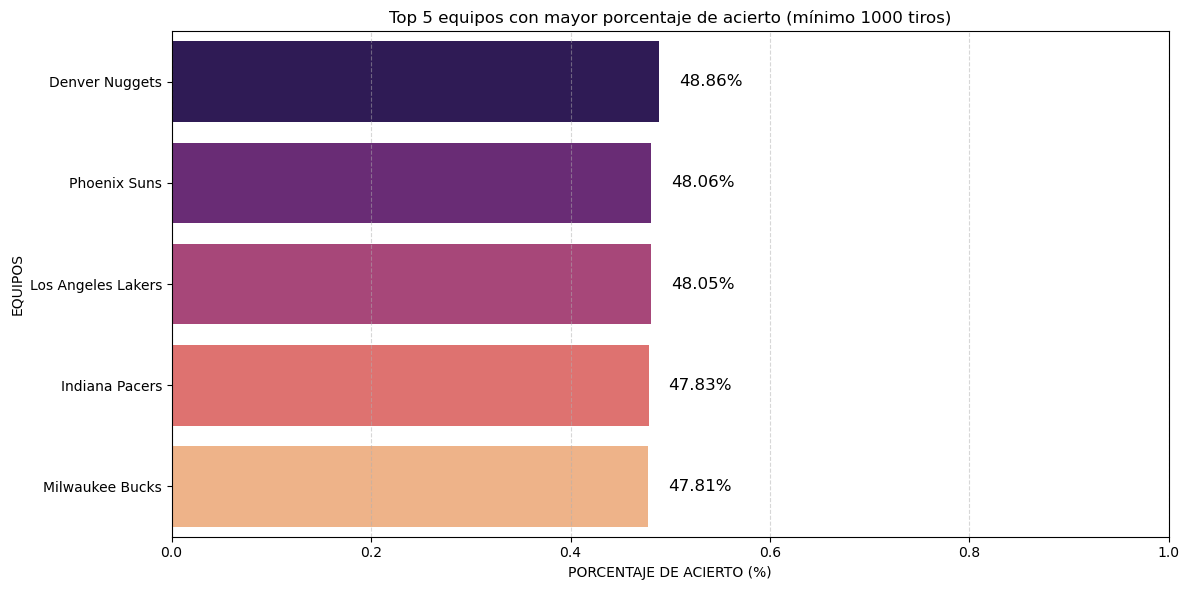

In [ ]:
# Agrupar por equipo
team_stats = df.groupby('TEAM_NAME').agg(
    shots_made=('SHOT_MADE', 'sum'),
    shots_attempted=('SHOT_MADE', 'count')
).reset_index()

# Calcular porcentaje de acierto
team_stats['accuracy'] = team_stats['shots_made'] / team_stats['shots_attempted']

# (Opcional) Filtrar equipos con al menos 1000 tiros
team_stats_filtered = team_stats[team_stats['shots_attempted'] >= 1000]

# Ordenar y tomar top 5
top5_teams = team_stats_filtered.sort_values(by='accuracy', ascending=False).head(5)

# Graficar
plt.figure(figsize=(12, 6))    

for index, value in enumerate(top5_teams['accuracy']):
    plt.text(value + 0.02, index, f'{value:.2%}', va='center', fontsize=12)
plt.title('Top 5 equipos con mayor porcentaje de acierto (mínimo 1000 tiros)')
plt.xlabel('PORCENTAJE DE ACIERTO (%)')
plt.ylabel('EQUIPOS')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 🔍 Descripción breve:

- Evaluamos qué equipos convierten mejor sus intentos de tiro.

- Consideramos solo equipos con volumen relevante de tiros (1000+).

- El ranking es útil para entender qué franquicias son más eficientes ofensivamente.

### ✅ Conclusión:

- Esta gráfica te permite identificar a los equipos más efectivos al lanzar, lo que ayuda a analizar estrategias colectivas y eficiencia ofensiva general.
- Es complementaria a la gráfica por jugador.



### 🎯 Comparación 5 jugadores mas precisos

Vamos a responder esta pregunta:

- ¿Cuáles son los jugadores más precisos al lanzar y desde dónde suelen hacerlo?

### ✅ ¿Qué vamos a hacer?

- Agrupar los datos por jugador (PLAYER_NAME).

- Calcular:

    - Tiros totales realizados.

    - Porcentaje de aciertos (accuracy).

    - Porcentaje de fallos.

- Filtrar jugadores con mínimo 20 tiros para evitar sesgos.

- Visualizar los 5 jugadores con mejor porcentaje de acierto.

- Mostrar sus zonas de tiro (scatter plot sobre imagen de cancha).

- Añadir KPIs clave en cada gráfico individual.

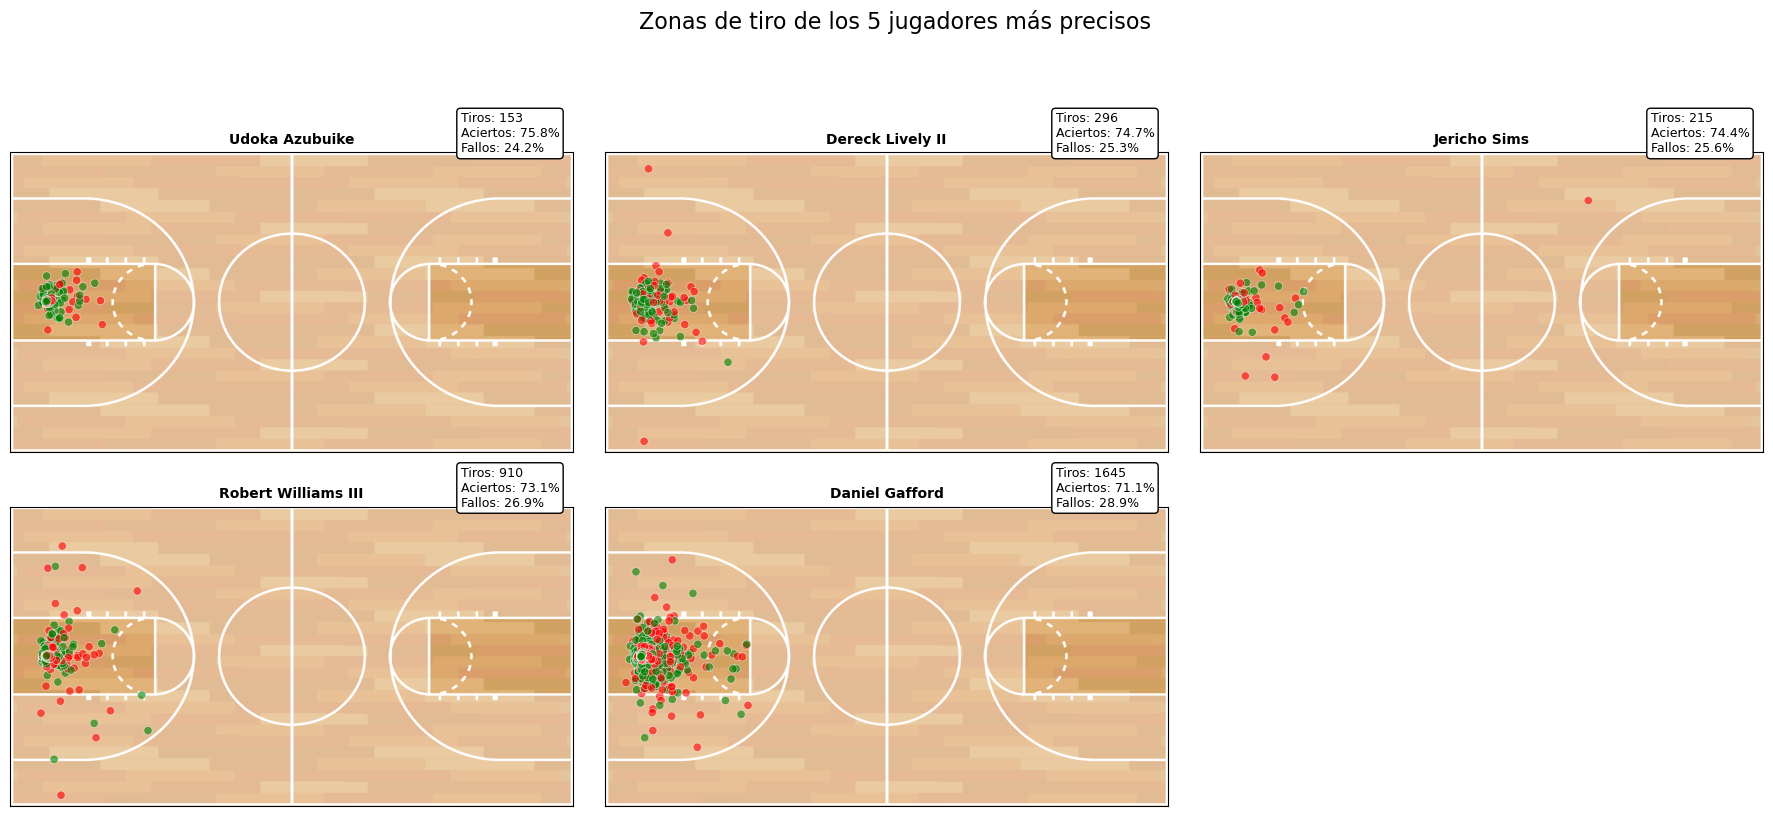

In [54]:
# Tomar top 5 por precisión
top5_players = player_stats_filtered.sort_values(by='accuracy', ascending=False).head(5)['PLAYER_NAME'].tolist()

# Cargar imagen de fondo
img = mpimg.imread('/home/reboot-student/Pictures/Screenshots/cancha.png')

# Crear subplots (4 filas, 3 columnas)
fig, axes = plt.subplots(4, 3, figsize=(18, 16), sharex=True, sharey=True)
axes = axes.flatten()

for i, player in enumerate(top5_players):
    ax = axes[i]
    player_data = df[df['PLAYER_NAME'] == player]

    # Calcular estadísticas
    total_shots = len(player_data)
    made_shots = player_data['SHOT_MADE'].sum()
    accuracy = made_shots / total_shots
    miss_pct = 1 - accuracy

    # Fondo de cancha
    ax.imshow(img, extent=[0, 90, -25, 25], aspect='auto', alpha=0.7)

    # Scatter plot del jugador
    sns.scatterplot(
        data=player_data,
        y='LOC_X',
        x='LOC_Y',
        hue='SHOT_MADE',
        palette={0: 'red', 1: 'green'},
        ax=ax,
        legend=False,
        alpha=0.6
    )

    # Título y límites
    ax.set_title(player, fontsize=10, fontweight='bold')
    ax.set_xlim(0, 90)
    ax.set_ylim(-25, 25)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.grid(False)

    # Texto con KPIs en la esquina superior izquierda
    ax.text(
        72, 25,  # posición dentro de la cancha
        f"Tiros: {total_shots}\nAciertos: {accuracy:.1%}\nFallos: {miss_pct:.1%}",
        fontsize=9,
        color='black',
        backgroundcolor='white',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    )

# Ocultar subplots sobrantes si hay menos de 12
for j in range(len(top5_players), len(axes)):
    fig.delaxes(axes[j])

# Título general
plt.suptitle('Zonas de tiro de los 5 jugadores más precisos', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### 🔍 Descripción breve:

Se visualiza la ubicación de los tiros intentados y acertados por cada uno de los 5 jugadores más efectivos.

Los tiros acertados aparecen en verde y los fallados en rojo.

En cada gráfico se incluyen:

- Número total de tiros.

- Porcentaje de acierto.


### ✅ Conclusión:

- Eficiencia en zona restringida: Todos los jugadores muestran mayor concentración de tiros cerca del aro, donde los porcentajes de acierto son tradicionalmente más altos.

- Perfil de jugador: Los 5 son principalmente big men (pívots/ala-pívots) que operan cerca del aro, lo que explica sus altos porcentajes.

- Relación volumen-precisión: Se observa una correlación inversa entre cantidad de tiros y porcentaje de acierto (ej. Williams con 930 tiros y 73.1% vs Gafford con 1645 tiros y 71.1%).

- Patrones espaciales: Las gráficas revelan que estos jugadores evitan zonas de bajo porcentaje como el perímetro, concentrándose en áreas de alto rendimiento.

- Estrategia de juego: Estos datos confirman que los equipos optimizan su ofensiva asignando tiros cercanos al aro a sus jugadores más efectivos en esas zonas.

In [55]:
# Agrupar por jugador
player_stats = df.groupby('PLAYER_NAME').agg(
    shots_made=('SHOT_MADE', 'sum'),
    shots_attempted=('SHOT_MADE', 'count')
).reset_index()

# Calcular precisión y fallos
player_stats['accuracy'] = player_stats['shots_made'] / player_stats['shots_attempted']
player_stats['missed_shots'] = player_stats['shots_attempted'] - player_stats['shots_made']
player_stats['miss_pct'] = 1 - player_stats['accuracy']

# Filtrar jugadores con al menos 100 tiros (ajustable)
player_stats_filtered = player_stats[player_stats['shots_attempted'] >= 100]

# Tomar top 5 jugadores más precisos
player_kpi_top5 = player_stats_filtered.sort_values(by='accuracy', ascending=False).head(5)

# Formatear columnas como porcentaje
player_kpi_top5['accuracy'] = player_kpi_top5['accuracy'].apply(lambda x: f"{x:.2%}")
player_kpi_top5['miss_pct'] = player_kpi_top5['miss_pct'].apply(lambda x: f"{x:.2%}")

# Reordenar y renombrar columnas
player_kpi_top5 = player_kpi_top5[[
    'PLAYER_NAME', 'shots_attempted', 'shots_made', 'missed_shots', 'accuracy', 'miss_pct'
]]
player_kpi_top5.columns = [
    'Jugador', 'Tiros intentados', 'Tiros acertados', 'Tiros fallados', 'Precisión', 'Fallo %'
]

# Mostrar tabla tipo KPI
print(player_kpi_top5.to_string(index=False))


            Jugador  Tiros intentados  Tiros acertados  Tiros fallados Precisión Fallo %
     Udoka Azubuike               153              116              37    75.82%  24.18%
   Dereck Lively II               296              221              75    74.66%  25.34%
       Jericho Sims               215              160              55    74.42%  25.58%
Robert Williams III               910              665             245    73.08%  26.92%
     Daniel Gafford              1645             1170             475    71.12%  28.88%


In [56]:
# Obtener posiciones únicas de los top 5 jugadores

top5_positions = df[df['PLAYER_NAME'].isin(top5_players)][['PLAYER_NAME', 'POSITION_GROUP']].drop_duplicates()

print(top5_positions)


                PLAYER_NAME POSITION_GROUP
33           Daniel Gafford              C
37124   Robert Williams III              C
45049        Udoka Azubuike              C
73858          Jericho Sims              C
167432     Dereck Lively II              C
436226         Jericho Sims              F
653564       Daniel Gafford              F


In [57]:
# Filtrar datos para los jugadores top5
top5_data = df[df['PLAYER_NAME'].isin(top5_players)]

# Agrupar por jugador y calcular:
# - Total de aciertos
# - Acción más común
top5_summary = top5_data[top5_data['SHOT_MADE'] == 1].groupby('PLAYER_NAME').agg(
    total_aciertos=('SHOT_MADE', 'count'),
    accion_mas_comun=('ACTION_TYPE', lambda x: x.mode().iloc[0] if not x.mode().empty else 'Desconocido')
)

print(top5_summary)


                     total_aciertos     accion_mas_comun
PLAYER_NAME                                             
Daniel Gafford                 1170  Alley Oop Dunk Shot
Dereck Lively II                221  Alley Oop Dunk Shot
Jericho Sims                    160  Alley Oop Dunk Shot
Robert Williams III             665  Alley Oop Dunk Shot
Udoka Azubuike                  116            Dunk Shot


### 🏀 Tipos de Mates (o Volcadas) en Baloncesto

##### Dunk Shot → Mate / Volcada:
➡️ Es cuando un jugador salta y encesta el balón directamente en la canasta con una o ambas manos.

##### Alley Oop Dunk Shot → Alley-Oop con Mate:
➡️ Es una jugada en la que un jugador lanza el balón cerca del aro y un compañero lo atrapa en el aire para realizar un mate sin que el balón toque el suelo.

### 📊 Análisis de Jugadores Más Precisos

- Zonas de Tiro: Los jugadores más precisos tienden a realizar la mayoría de sus tiros cerca del aro, en la pintura, aunque algunos también son efectivos desde la media distancia.

- Tipos de Tiro: Dominan los mates (dunk shots) y los alley-oops, además de los jump shots y algunos fadeaways. Los tiros de tres puntos son muy poco frecuentes.

- Estilo de Juego: Se destacan por su alta eficiencia cerca del aro y en jugadas rápidas. Su precisión es más alta en tiros cercanos que en los de larga distancia.

## 📈 Identificación de patrones, tendencias y anomalías
### ✅ Patrones encontrados:

- Pívots y jugadores interiores ('POSITION' = C, F..) tienen los mejores porcentajes de acierto, generalmente por tirar cerca del aro.

- Equipos con juego en conjunto eficiente (Denver Nuggets, Suns) muestran alta precisión colectiva.

- Zonas como debajo del aro (la pintura) son las más efectivas en general.

### 🚩 Anomalías observadas:

- Algunos jugadores con pocos intentos mostraban alta precisión (sesgo por bajo volumen).

- Equipos con alto volumen de tiros no siempre tienen alta precisión (ej. Lakers vs Nuggets).

- Tiros de larga distancia (zona de 3 puntos) tienen bajo porcentaje a pesar de su frecuencia.

### 🔍 Descripción de

- El gráfico compara espacialmente dónde lanzan y aciertan los 5 equipos más precisos.

- Permite ver patrones de tiro:

    - Si tiran más cerca del aro.

    - Si distribuyen sus tiros de forma balanceada.

    - Si los fallos se concentran en ciertas zonas.

- También destaca eficiencia relativa:

    - Equipos que tiran poco pero aciertan mucho.

    - Equipos que tiran mucho con alta precisión.

### 🏀 Comparación 5 equipos más precisos

Vamos a responder esta pregunta:

- ¿Cuáles son los equipos más precisos y desde dónde suelen hacerlo?

### ✅ ¿Qué vamos a hacer?

- Agrupar los datos por equipo (TEAM_NAME).

- Calcular:

    - Tiros totales realizados.

    - Porcentaje de aciertos (accuracy).

    - Porcentaje de fallos.

- Filtrar equipos con mínimo 100 tiros para evitar sesgos por bajo volumen.

- Visualizar los 5 equipos con mejor porcentaje de acierto.

- Mostrar sus zonas de tiro (scatter plot sobre imagen de cancha).

- Añadir KPIs clave en cada gráfico individual.



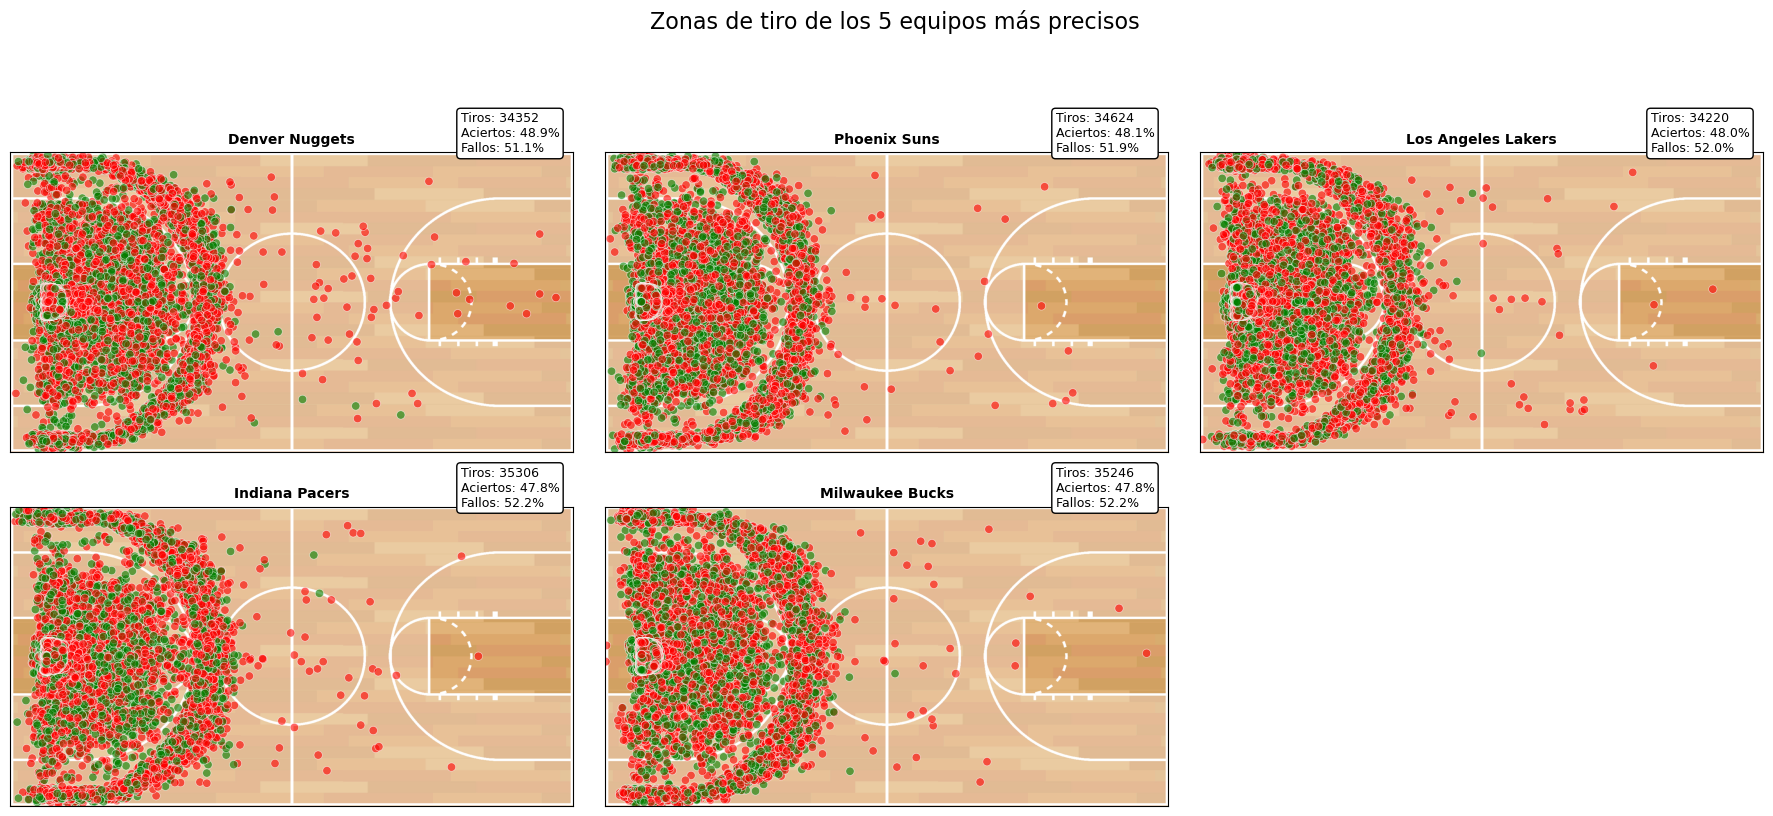

In [58]:
# Agrupar por equipo
team_stats = df.groupby('TEAM_NAME').agg(
    shots_made=('SHOT_MADE', 'sum'),
    shots_attempted=('SHOT_MADE', 'count')
).reset_index()

# Calcular porcentaje de acierto
team_stats['accuracy'] = team_stats['shots_made'] / team_stats['shots_attempted']

# Filtrar equipos con al menos 100 tiros (puedes ajustar este umbral)
team_stats_filtered = team_stats[team_stats['shots_attempted'] >= 100]

# Ordenar y tomar top 5
top5_teams = team_stats_filtered.sort_values(by='accuracy', ascending=False).head(5)['TEAM_NAME'].tolist()

# Cargar imagen de fondo
img = mpimg.imread('/home/reboot-student/Pictures/Screenshots/cancha.png')

# Crear subplots (4 filas, 3 columnas)
fig, axes = plt.subplots(4, 3, figsize=(18, 16), sharex=True, sharey=True)
axes = axes.flatten()

for i, team in enumerate(top5_teams):
    ax = axes[i]
    team_data = df[df['TEAM_NAME'] == team]

    # Calcular estadísticas
    total_shots = len(team_data)
    made_shots = team_data['SHOT_MADE'].sum()
    accuracy = made_shots / total_shots
    miss_pct = 1 - accuracy

    # Fondo de cancha
    ax.imshow(img, extent=[0, 90, -25, 25], aspect='auto', alpha=0.7)
    # Scatter plot del equipo
    sns.scatterplot(
        data=team_data,
        y='LOC_X',
        x='LOC_Y',
        hue='SHOT_MADE',
        palette={0: 'red', 1: 'green'},
        ax=ax,
        legend=False,
        alpha=0.6
    )

    # Título y límites
    ax.set_title(team, fontsize=10, fontweight='bold')
    ax.set_xlim(0, 90)
    ax.set_ylim(-25, 25)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.grid(False)

    # Texto con KPIs en la esquina superior izquierda
    ax.text(
        72, 25,  # posición dentro del gráfico
        f"Tiros: {total_shots}\nAciertos: {accuracy:.1%}\nFallos: {miss_pct:.1%}",
        fontsize=9,
        color='black',
        backgroundcolor='white',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    )

# Ocultar subplots sobrantes si hay menos de 12
for j in range(len(top5_teams), len(axes)):
    fig.delaxes(axes[j])

# Título general
plt.suptitle('Zonas de tiro de los 5 equipos más precisos', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### 🔍 Descripción breve

Se visualiza la ubicación de los tiros intentados y acertados por cada uno de los 5 equipos con mayor precisión.

Los tiros acertados aparecen en verde y los fallados en rojo.

En cada gráfico se incluyen:

- Número total de tiros.

- Porcentaje de acierto.

- Porcentaje de fallos.

### ✅ Conclusión

- Esta gráfica permite identificar qué equipos son más eficientes al lanzar y desde qué zonas lo logran.

- Al incluir el volumen total de tiros, se evita destacar equipos con pocos intentos y posibles sesgos.

- Es una herramienta valiosa tanto para análisis táctico como para scouting de rivales.

- Complementa el análisis individual (jugadores), ofreciendo una perspectiva agregada de la efectividad ofensiva por equipo.

In [59]:
# Crear tabla KPI para equipos
team_kpi = team_stats_filtered.copy()

team_kpi['missed_shots'] = team_kpi['shots_attempted'] - team_kpi['shots_made']
team_kpi['miss_pct'] = 1 - team_kpi['accuracy']

# Elegimos el top 5 más precisos
team_kpi_top5 = team_kpi.sort_values(by='accuracy', ascending=False).head(5)

# Formatear como porcentajes
team_kpi_top5['accuracy'] = team_kpi_top5['accuracy'].apply(lambda x: f"{x:.2%}")
team_kpi_top5['miss_pct'] = team_kpi_top5['miss_pct'].apply(lambda x: f"{x:.2%}")

# Reordenar columnas para visual tipo KPI
team_kpi_top5 = team_kpi_top5[['TEAM_NAME', 'shots_attempted', 'shots_made', 'missed_shots', 'accuracy', 'miss_pct']]
team_kpi_top5.columns = ['Equipo', 'Tiros intentados', 'Tiros acertados', 'Tiros fallados', 'Precisión', 'Fallo %']

print(team_kpi_top5.to_string(index=False))


            Equipo  Tiros intentados  Tiros acertados  Tiros fallados Precisión Fallo %
    Denver Nuggets             34352            16783           17569    48.86%  51.14%
      Phoenix Suns             34624            16640           17984    48.06%  51.94%
Los Angeles Lakers             34220            16442           17778    48.05%  51.95%
    Indiana Pacers             35306            16887           18419    47.83%  52.17%
   Milwaukee Bucks             35246            16852           18394    47.81%  52.19%


### Comparativa de los 5 Jugadores y Equipos Más Precisos

Al comparar los top 5 jugadores con los top 5 equipos, se observa una alta correlación en su rendimiento:

- Precisión y Consistencia: Los jugadores con mayor precisión coinciden con los equipos más efectivos, reflejando la conexión entre rendimiento individual y colectivo.

- Zonas de tiro estratégicas: Ambos grupos destacan por su capacidad para seleccionar zonas de tiro más efectivas, resultando en una mayor tasa de aciertos.

- Juego colectivo vs. individual: Los jugadores clave en los equipos más precisos reflejan patrones similares a los de los mejores jugadores individuales, mostrando que la eficiencia individual se traduce en mejores resultados para el equipo.

En resumen, tanto los jugadores más precisos como los equipos más efectivos destacan por su estrategia de tiro, consistencia y toma de decisiones en el campo.

## TOP 5 JUGADORES con mas aciertos en total

In [60]:
# Agrupar por jugador y equipo, y contar el total de tiros acertados
top_players = df.groupby(['PLAYER_NAME', 'TEAM_NAME'])['SHOT_MADE'].sum().reset_index()

# Ordenar por la columna 'SHOT_MADE' de forma descendente
top_players = top_players.sort_values(by='SHOT_MADE', ascending=False)

# Seleccionar los 5 jugadores con más tiros acertados
top_5_players = top_players.head(5)

# Mostrar el resultado
print(top_5_players)


                PLAYER_NAME         TEAM_NAME  SHOT_MADE
624   Giannis Antetokounmpo   Milwaukee Bucks       3544
1402           Nikola Jokic    Denver Nuggets       3529
1195            Luka Doncic  Dallas Mavericks       3392
858            Jayson Tatum    Boston Celtics       3264
462            Devin Booker      Phoenix Suns       3081


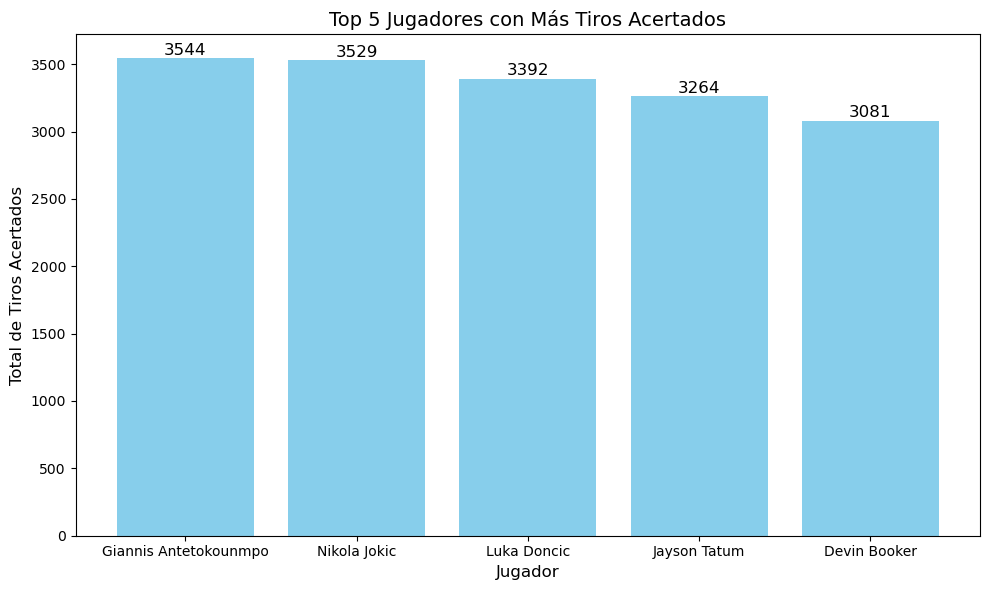

In [61]:

# Agrupar por jugador y equipo, y contar el total de tiros acertados
top_players = df.groupby(['PLAYER_NAME', 'TEAM_NAME'])['SHOT_MADE'].sum().reset_index()

# Ordenar por la columna 'SHOT_MADE' de forma descendente
top_players = top_players.sort_values(by='SHOT_MADE', ascending=False)

# Seleccionar los 5 jugadores con más tiros acertados
top_5_players = top_players.head(5)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_5_players['PLAYER_NAME'], top_5_players['SHOT_MADE'], color='skyblue')

# Añadir título y etiquetas
plt.title('Top 5 Jugadores con Más Tiros Acertados', fontsize=14)
plt.xlabel('Jugador', fontsize=12)
plt.ylabel('Total de Tiros Acertados', fontsize=12)

# Añadir las etiquetas sobre las barras para mostrar los valores
for index, value in enumerate(top_5_players['SHOT_MADE']):
    plt.text(index, value + 2, str(value), ha='center', va='bottom', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


### Descripción

1. El gráfico y los resultados muestran a los 5 jugadores con más tiros acertados, basados en el total de aciertos. Los jugadores están agrupados por nombre y equipo, y se ordenan en función de la cantidad de tiros acertados.

2. El gráfico de barras visualiza el total de tiros acertados por cada uno de estos jugadores, permitiendo comparar su efectividad.
Conclusión

- Los jugadores con más aciertos reflejan un alto nivel de consistencia y rendimiento.

- Este análisis es útil para identificar a los jugadores más destacados, lo cual puede ser valioso tanto para estrategias ofensivas como para evaluar contribuciones individuales en el equipo.

## TOP 5 EQUIPOS con mas aciertos en total

In [62]:
# Agrupar por equipo y sumar los tiros acertados
top_teams = df.groupby('TEAM_NAME')['SHOT_MADE'].sum().reset_index()

# Ordenar por la columna 'SHOT_MADE' de forma descendente
top_teams = top_teams.sort_values(by='SHOT_MADE', ascending=False)

# Seleccionar los equipos con mayor número de aciertos (por ejemplo, los 5 primeros)
top_5_teams = top_teams.head(5)

# Mostrar el resultado
print(top_5_teams)



            TEAM_NAME  SHOT_MADE
11     Indiana Pacers      16887
16    Milwaukee Bucks      16852
7      Denver Nuggets      16783
23       Phoenix Suns      16640
26  San Antonio Spurs      16526


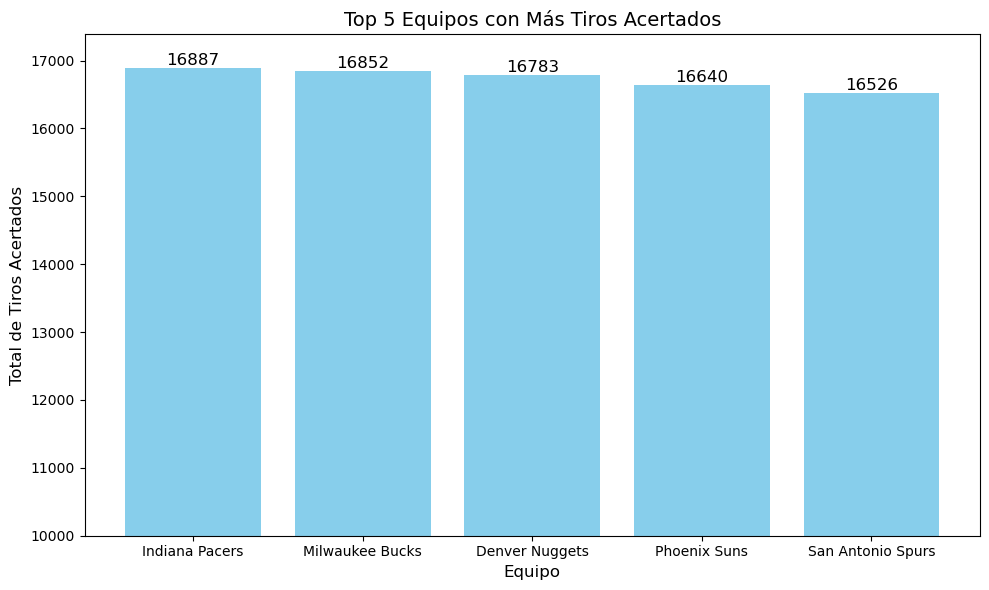

In [80]:
# Ordenar los equipos por tiros acertados
top_5_teams_sorted = top_5_teams.sort_values(by='SHOT_MADE', ascending=False)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_5_teams_sorted['TEAM_NAME'], top_5_teams_sorted['SHOT_MADE'], color='skyblue')

# Añadir título y etiquetas
plt.title('Top 5 Equipos con Más Tiros Acertados', fontsize=14)
plt.xlabel('Equipo', fontsize=12)
plt.ylabel('Total de Tiros Acertados', fontsize=12)

# Ajustar el rango del eje Y para enfocar las pequeñas diferencias
plt.ylim(10000, max(top_5_teams_sorted['SHOT_MADE']) + 500)

# Añadir las etiquetas sobre las barras para mostrar los valores
for index, value in enumerate(top_5_teams_sorted['SHOT_MADE']):
    plt.text(index, value + 2, str(value), ha='center', va='bottom', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()




### Descripción

1. Tabla de Equipos con Más Tiros Acertados:

- Se agruparon los datos por equipo, y luego se sumaron los tiros acertados por cada uno.

- Después de ordenar los equipos por el total de aciertos de manera descendente, se seleccionaron los 5 equipos con más tiros acertados.

El resultado muestra una tabla con el nombre de los equipos y el total de tiros acertados, permitiendo identificar cuáles son los más efectivos.

2. Gráfico de Barras de Equipos con Más Tiros Acertados:

- El gráfico de barras presenta a los top 5 equipos con más tiros acertados de forma visual.

- Las barras se ordenan de menor a mayor, y cada barra está etiquetada con el número de tiros acertados.

- Se ajusta el eje Y para enfocarse en las diferencias más pequeñas, proporcionando una comparación más precisa entre los equipos.

Este gráfico facilita la visualización de la efectividad ofensiva de los equipos más destacados.

### Conclusión

- Equipos más efectivos: Los cinco equipos con mayor cantidad de aciertos destacan por su precisión en el ataque.

- La visualización resalta las pequeñas diferencias entre los equipos, lo que puede ser crucial para analizar el rendimiento colectivo.

- Este análisis es útil tanto para estrategias ofensivas a nivel individual como para evaluaciones comparativas entre equipos.

